In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Datasets/E-Commerce_train.csv',sep=';',encoding='UTF-8')

1. Valores duplicados y nulos

In [3]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [4]:
print('La cantidad de registros duplicados es:', data.duplicated().sum())

La cantidad de registros duplicados es: 0


In [5]:
import missingno as msno

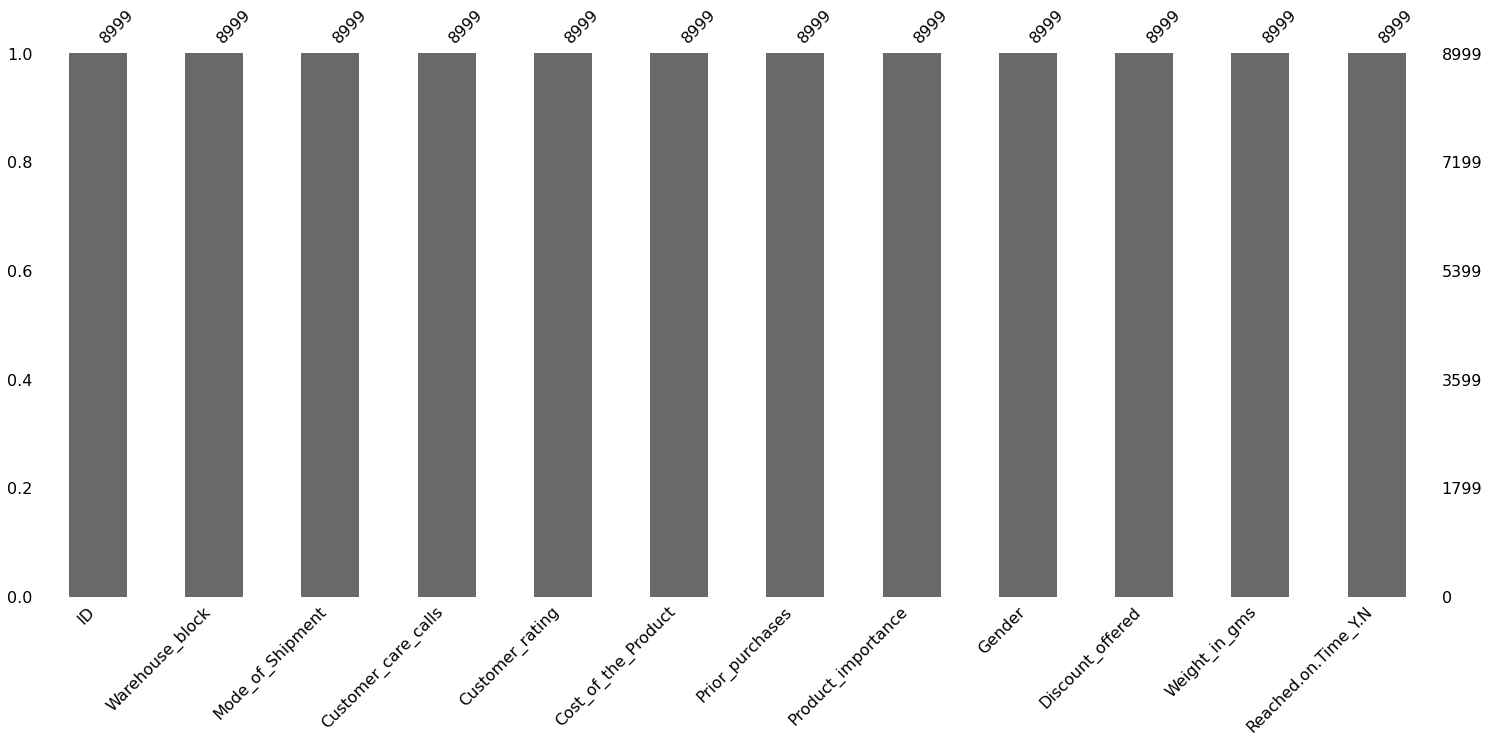

In [6]:
msno.bar(data)
plt.show()

2. Valores atípicos

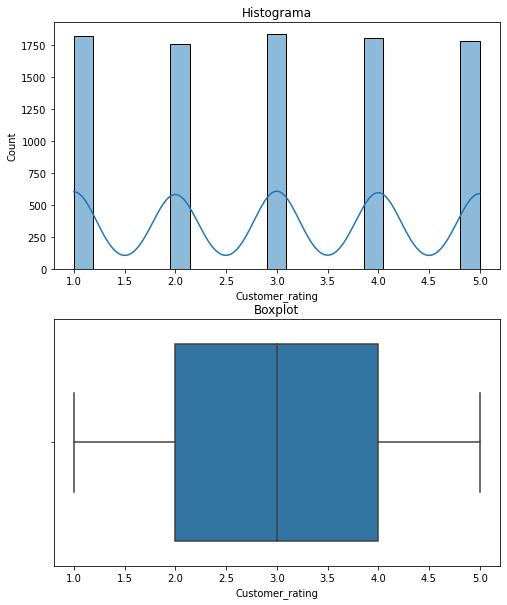

In [7]:
# Veamos cómo se distribuye la variable y su boxplot
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = 'Customer_rating', data= data, kde = True)
axes[0].set_title('Histograma') 

sns.boxplot(ax = axes[1],x = 'Customer_rating', data = data)
axes[1].set_title('Boxplot') 
plt.show()

In [8]:
data['Customer_rating'].describe()

count    8999.000000
mean        2.994999
std         1.413143
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer_rating, dtype: float64

In [9]:
data[(data['Customer_rating']>=5)&(data['Reached.on.Time_Y.N']==1)].shape

(1144, 12)

In [10]:
data[(data['Customer_rating']>=5)&(data['Reached.on.Time_Y.N']==0)].shape

(635, 12)

In [11]:
data[(data['Customer_rating']<=1)&(data['Reached.on.Time_Y.N']==1)].shape

(1142, 12)

In [12]:
data[(data['Customer_rating']<=1)&(data['Reached.on.Time_Y.N']==0)].shape

(681, 12)

El puntaje del cliente ('Customer_rating') no influye de manera significativa en la probabilidad de entrega

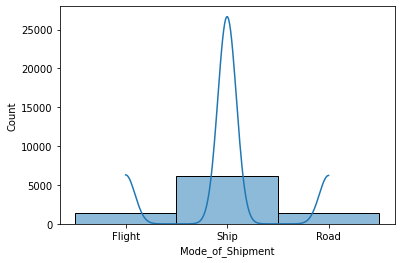

In [13]:
sns.histplot(x = 'Mode_of_Shipment', data= data, kde = True)
plt.show()

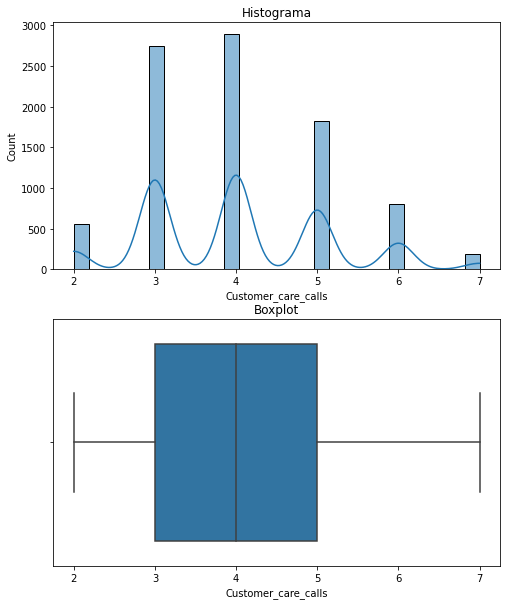

In [14]:
# Veamos cómo se distribuye la variable y su boxplot
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = 'Customer_care_calls', data= data, kde = True)
axes[0].set_title('Histograma') 

sns.boxplot(ax = axes[1],x = 'Customer_care_calls', data = data)
axes[1].set_title('Boxplot') 
plt.show()

In [15]:
data['Customer_care_calls'].describe()

count    8999.000000
mean        4.015113
std         1.138934
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Customer_care_calls, dtype: float64

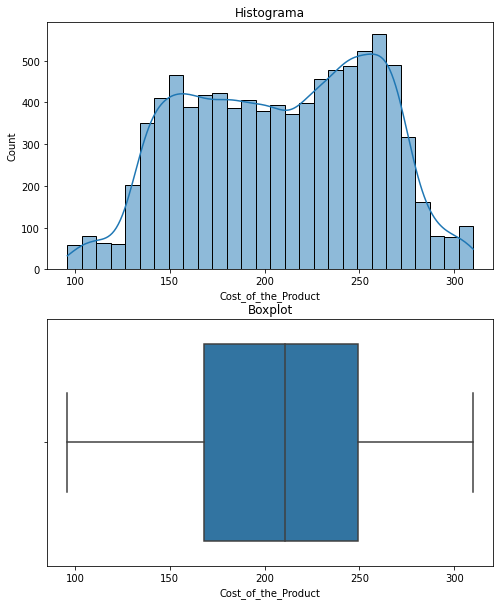

In [16]:
# Veamos cómo se distribuye la variable y su boxplot
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = 'Cost_of_the_Product', data= data, kde = True)
axes[0].set_title('Histograma') 

sns.boxplot(ax = axes[1],x = 'Cost_of_the_Product', data = data)
axes[1].set_title('Boxplot') 
plt.show()

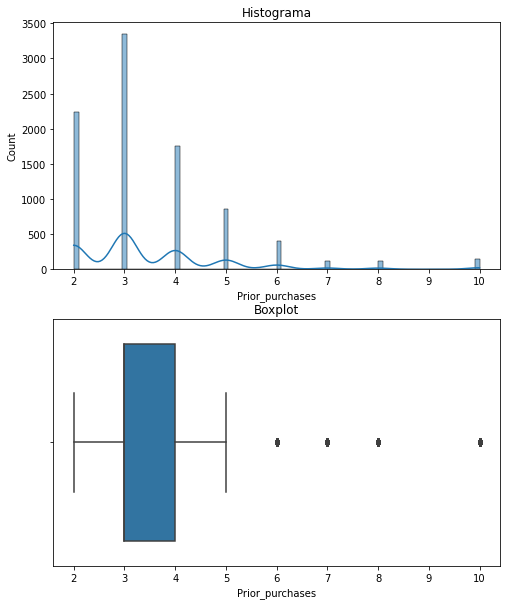

In [17]:
# Veamos cómo se distribuye la variable y su boxplot
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = 'Prior_purchases', data= data, kde = True)
axes[0].set_title('Histograma') 

sns.boxplot(ax = axes[1],x = 'Prior_purchases', data = data)
axes[1].set_title('Boxplot') 
plt.show()

In [18]:
data['Prior_purchases'].describe()

count    8999.000000
mean        3.511501
std         1.532074
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Prior_purchases, dtype: float64

In [19]:
data[data['Prior_purchases']>=6]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
37,38,F,Ship,2,4,181,6,medium,F,16,3605,1
62,63,A,Ship,5,1,105,6,medium,M,62,1292,1
74,75,A,Ship,6,1,238,6,low,F,13,2442,1
90,91,D,Ship,5,3,174,6,high,F,41,1085,1
133,134,F,Flight,5,4,280,6,medium,F,51,3582,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8864,8865,A,Ship,5,1,254,6,low,M,1,1021,0
8866,8867,C,Ship,5,1,267,6,low,M,3,1803,0
8887,8888,F,Road,3,4,219,6,low,F,2,1837,0
8928,8929,D,Ship,5,5,265,6,low,M,4,1937,1


In [20]:
data[(data['Prior_purchases']>=6)&(data['Reached.on.Time_Y.N']==1)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
37,38,F,Ship,2,4,181,6,medium,F,16,3605,1
62,63,A,Ship,5,1,105,6,medium,M,62,1292,1
74,75,A,Ship,6,1,238,6,low,F,13,2442,1
90,91,D,Ship,5,3,174,6,high,F,41,1085,1
133,134,F,Flight,5,4,280,6,medium,F,51,3582,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8850,8851,D,Ship,4,4,266,7,medium,M,3,5672,1
8854,8855,C,Ship,3,1,138,10,low,F,4,4496,1
8856,8857,D,Ship,4,1,211,7,high,M,4,4476,1
8857,8858,F,Ship,6,4,137,8,low,F,9,4374,1


Los clientes que tienen mayores pedidos previos tienden a obtener una mayor probabilidad de entrega a tiempo.

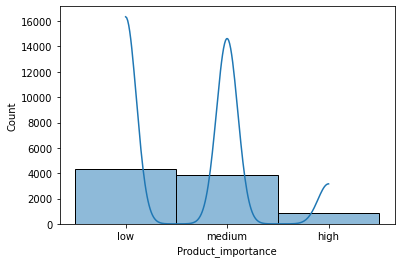

In [21]:
sns.histplot(x = 'Product_importance', data= data, kde = True)
plt.show()

In [22]:
data['Product_importance'].describe()

count     8999
unique       3
top        low
freq      4308
Name: Product_importance, dtype: object

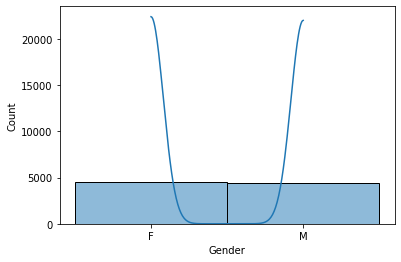

In [23]:
#Gender	Discount_offered	Weight_in_gms	Reached.on.Time_Y.N
sns.histplot(x = 'Gender', data= data, kde = True)
plt.show()

In [24]:
data['Gender'].describe()

count     8999
unique       2
top          F
freq      4540
Name: Gender, dtype: object

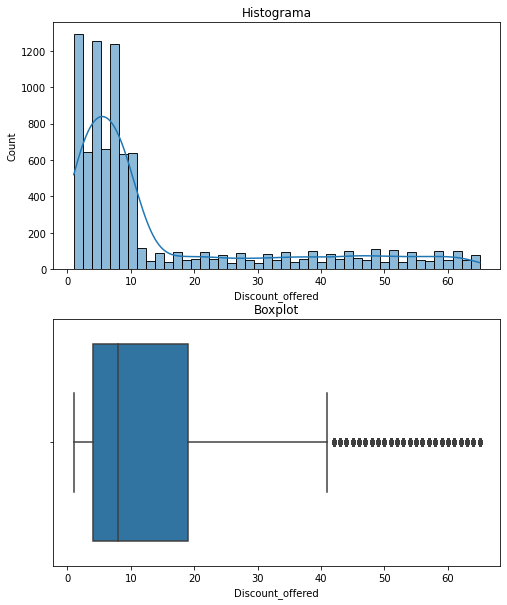

In [25]:
# Veamos cómo se distribuye la variable y su boxplot
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = 'Discount_offered', data= data, kde = True)
axes[0].set_title('Histograma')

sns.boxplot(ax = axes[1],x = 'Discount_offered', data = data)
axes[1].set_title('Boxplot')
plt.show()

In [26]:
data['Discount_offered'].describe()

count    8999.000000
mean       15.097678
std        17.400040
min         1.000000
25%         4.000000
50%         8.000000
75%        19.000000
max        65.000000
Name: Discount_offered, dtype: float64

In [27]:
#Viendo outliers de 'Discount_offered'
u = data['Discount_offered'].mean()
s = data['Discount_offered'].std()
data[data['Discount_offered']>=(u+2*s)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
21,22,B,Ship,3,1,232,4,medium,F,51,2899,1
31,32,F,Ship,5,3,257,2,low,F,61,3341,1
36,37,D,Ship,3,5,137,4,high,F,62,1477,1
38,39,A,Ship,5,1,215,4,low,F,56,3905,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3101,3102,F,Ship,3,2,225,3,low,F,59,3488,1
3104,3105,A,Ship,2,2,273,3,low,M,56,2633,1
3130,3131,C,Road,6,5,246,4,medium,M,50,3618,1
3131,3132,F,Road,4,1,232,3,medium,M,55,2686,1


In [28]:
data[data['Discount_offered']<=(u+1*s)].shape

(7373, 12)

In [29]:
data[(data['Discount_offered']<=(u+1*s))&(data['Reached.on.Time_Y.N']==1)].shape

(4093, 12)

El descuento ofrecido afecta a la probabilidad de que el producto se entregue a tiempo.<br>
La data que parece atípica no es erronea ya que normalmente la cantidad de descuentos mayores a 40% son menores a la cantidad común de descuentos (1% a 19%)

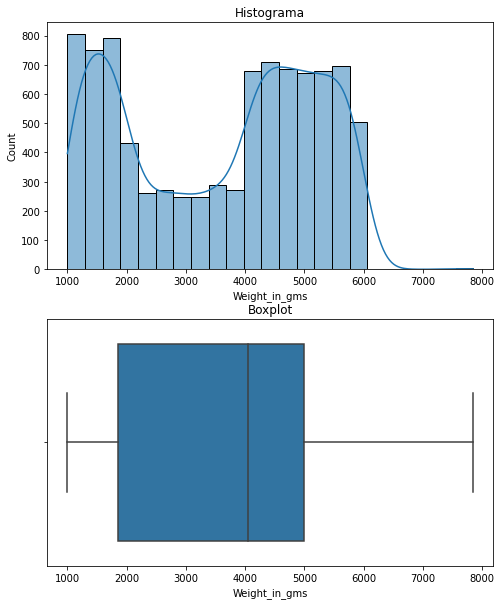

In [30]:
#Weight_in_gms	Reached.on.Time_Y.N
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = 'Weight_in_gms', data= data, kde = True)
axes[0].set_title('Histograma') 

sns.boxplot(ax = axes[1],x = 'Weight_in_gms', data = data)
axes[1].set_title('Boxplot') 
plt.show()

In [31]:
u = data['Weight_in_gms'].mean()
s = data['Weight_in_gms'].std()
data['Weight_in_gms'].describe()

count    8999.000000
mean     3584.364596
std      1614.750194
min      1001.000000
25%      1857.000000
50%      4046.000000
75%      4999.500000
max      7846.000000
Name: Weight_in_gms, dtype: float64

In [32]:
data[data['Weight_in_gms']>=(u+1*s)].shape

(1809, 12)

In [33]:
data[(data['Weight_in_gms']>=(u+1*s))&(data['Reached.on.Time_Y.N']==1)].shape

(776, 12)

El peso en gramas afecta la probabilidad de entregar el producto a tiempo.

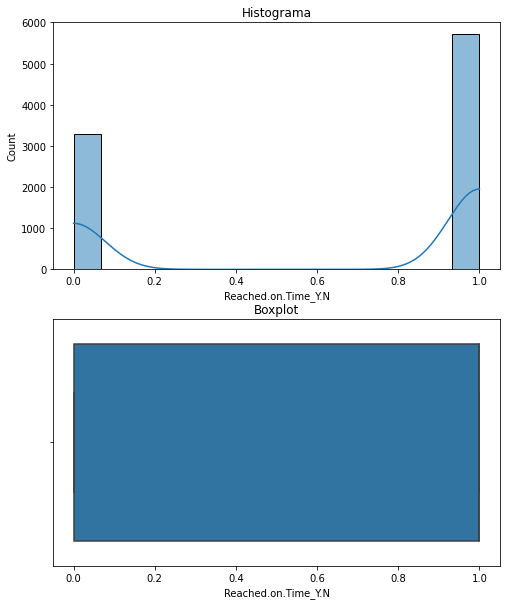

In [34]:
#Reached.on.Time_Y.N
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = 'Reached.on.Time_Y.N', data= data, kde = True)
axes[0].set_title('Histograma') 

sns.boxplot(ax = axes[1],x = 'Reached.on.Time_Y.N', data = data)
axes[1].set_title('Boxplot') 
plt.show()

3. Escalado/Normalización

Variables cuantitativas

In [35]:
from sklearn.preprocessing import StandardScaler

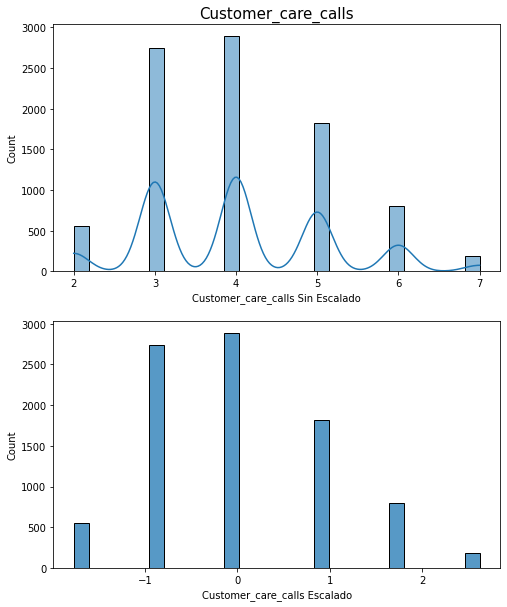

In [36]:
# Trabajaremos con la variable Customer_care_calls. Veamos su distribución
campo = 'Customer_care_calls'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

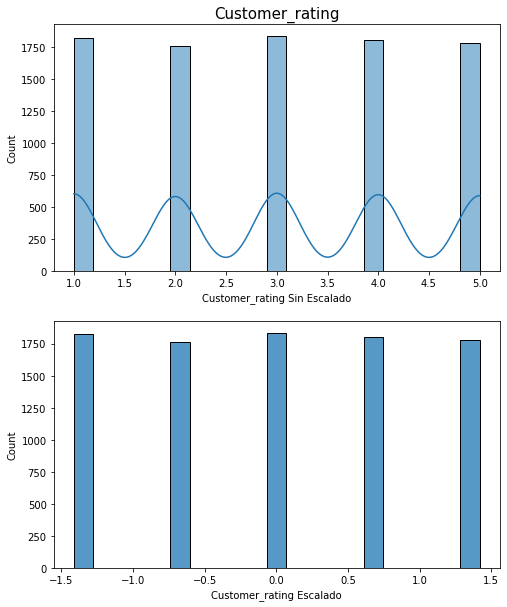

In [37]:
# Trabajaremos con la variable Customer_rating. Veamos su distribución
campo = 'Customer_rating'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

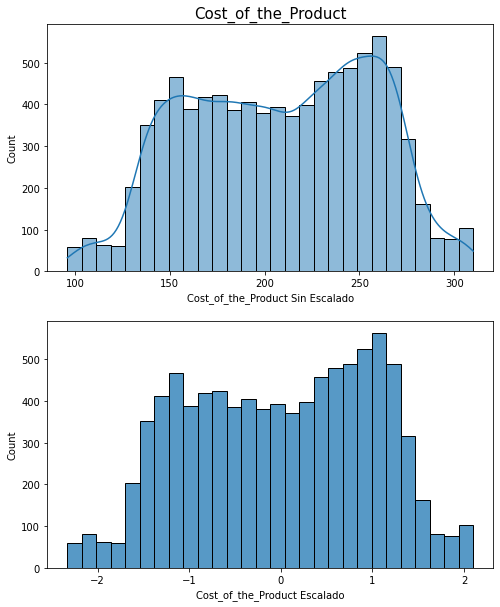

In [38]:
# Trabajaremos con la variable Cost_of_the_Product. Veamos su distribución
campo = 'Cost_of_the_Product'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

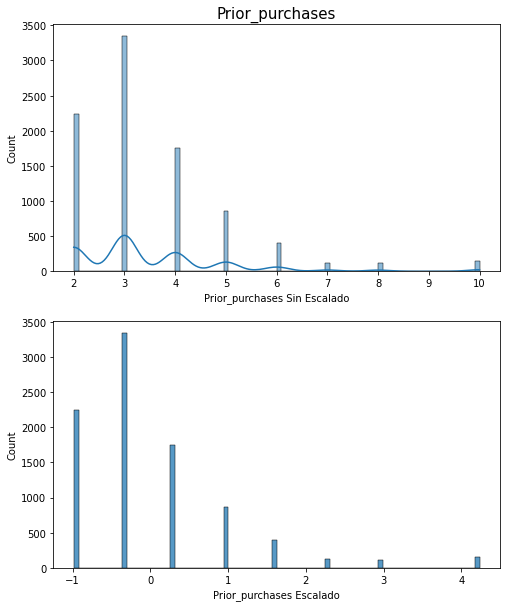

In [39]:
# Trabajaremos con la variable Prior_purchases. Veamos su distribución
campo = 'Prior_purchases'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

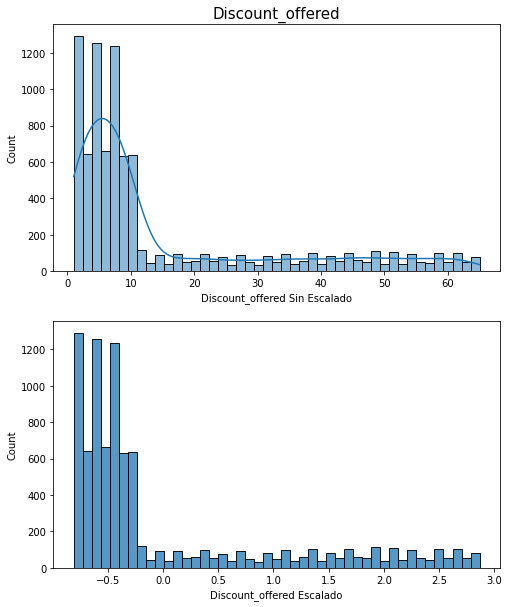

In [40]:
# Trabajaremos con la variable Discount_offered. Veamos su distribución
campo = 'Discount_offered'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

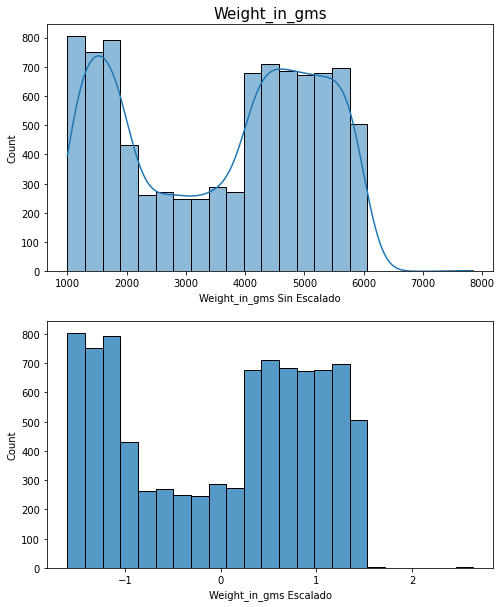

In [41]:
# Trabajaremos con la variable Weight_in_gms. Veamos su distribución
campo = 'Weight_in_gms'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

Variables cualitativas

In [42]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [43]:
# https://www.logiawms.com/abc-warehouse/
campo = 'Warehouse_block'

print('Original: ',data[campo].unique()) # Ordinal, label_encoding
data[campo] = label_encoder.fit_transform(data[campo])
print('Codificado:',data[campo].unique())

Original:  ['D' 'F' 'A' 'B' 'C']
Codificado: [3 4 0 1 2]


In [44]:
# https://www.ibm.com/docs/es/spss-statistics/saas?topic=charts-variable-types
campo = 'Mode_of_Shipment'

print('Original: ',data[campo].unique()) # Nominal, label_encoding
data[campo] = label_encoder.fit_transform(data[campo])
print('Codificado:',data[campo].unique())

Original:  ['Flight' 'Ship' 'Road']
Codificado: [0 2 1]


In [45]:
campo = 'Product_importance'# Ordinal, label_encoding

print('Original: ',data[campo].unique()) # Ordinal, label_encoding
data[campo] = label_encoder.fit_transform(data[campo])
print('Codificado:',data[campo].unique())

Original:  ['low' 'medium' 'high']
Codificado: [1 2 0]


In [46]:
campo = 'Gender'# Nominal, label_encoding

print('Original: ',data[campo].unique()) # Ordinal, label_encoding
data[campo] = label_encoder.fit_transform(data[campo])
print('Codificado:',data[campo].unique())

Original:  ['F' 'M']
Codificado: [0 1]


In [47]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,-0.013270,-0.704143,-0.653630,-0.333881,1,0,1.661141,-1.456259,1
1,2,4,0,-0.013270,1.418902,0.154049,-0.986627,1,1,2.523256,-0.307411,1
2,3,0,0,-1.769395,-0.704143,-0.529372,0.318866,1,1,1.891039,-0.130284,1
3,4,1,0,-0.891333,0.003539,-0.674340,0.318866,2,1,-0.292986,-1.490942,1
4,5,2,0,-1.769395,-0.704143,-0.508662,-0.333881,2,0,1.776090,-0.681484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,3,2,-0.891333,-1.411824,0.174759,-0.333881,1,0,-0.810254,0.367034,1
8995,8996,4,2,0.864793,0.003539,0.485405,-0.333881,2,1,-0.695306,0.583179,0
8996,8997,0,2,-0.013270,1.418902,1.065277,-0.333881,2,0,-0.522883,0.394284,0
8997,8998,1,2,-0.013270,-0.704143,-0.508662,-0.333881,2,0,-0.580357,1.453331,1


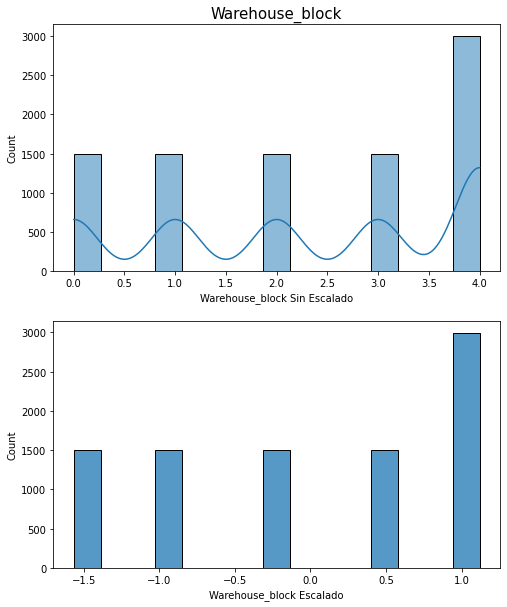

In [48]:
# Trabajaremos con la variable Warehouse_block. Veamos su distribución
campo = 'Warehouse_block'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

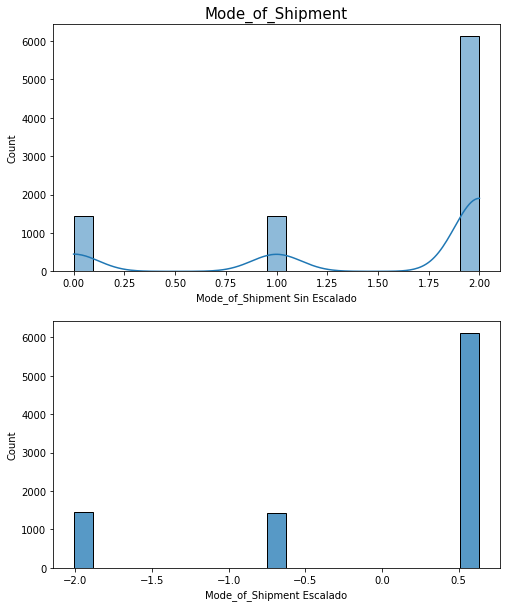

In [49]:
# Trabajaremos con la variable Mode_of_Shipment. Veamos su distribución
campo = 'Mode_of_Shipment'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

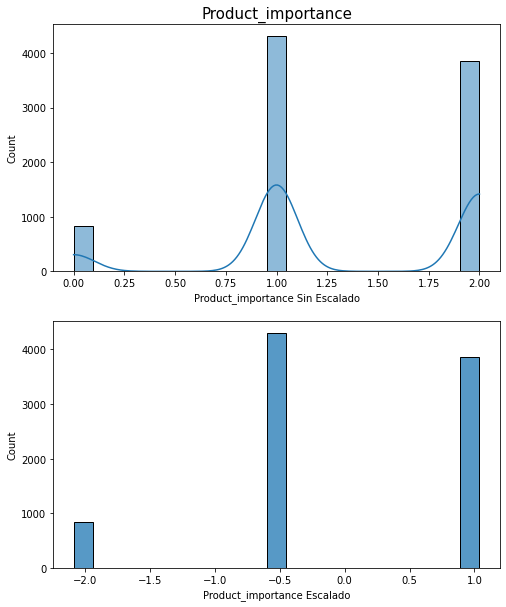

In [50]:
# Trabajaremos con la variable Product_importance. Veamos su distribución
campo = 'Product_importance'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

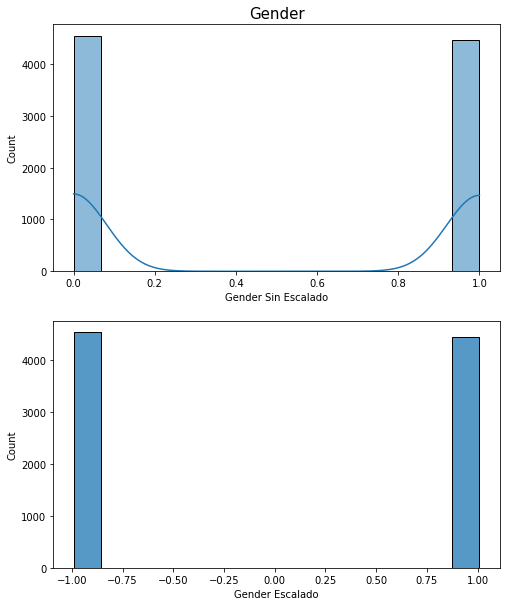

In [51]:
# Trabajaremos con la variable Gender. Veamos su distribución
campo = 'Gender'
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(ax = axes[0], x = campo, data= data, kde = True)
axes[0].set_title(campo,fontsize=15) 
#print('Sin escalar\n',data[campo].describe())
axes[0].set_xlabel(campo+' Sin Escalado')
# Escalamos

scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

# Observamos cómo quedó la distribución luego de escalar
sns.histplot(ax = axes[1],x = campo, data = data)
axes[1].set_title(' ')
axes[1].set_xlabel(campo+' Escalado')
#print('Escalado:\n',data[campo].describe())

plt.show()

Observamos la data preprocesada

In [52]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,0.447344,-2.010495,-0.013270,-0.704143,-0.653630,-0.333881,-0.526078,-0.991039,1.661141,-1.456259,1
1,2,1.118174,-2.010495,-0.013270,1.418902,0.154049,-0.986627,-0.526078,1.009042,2.523256,-0.307411,1
2,3,-1.565145,-2.010495,-1.769395,-0.704143,-0.529372,0.318866,-0.526078,1.009042,1.891039,-0.130284,1
3,4,-0.894315,-2.010495,-0.891333,0.003539,-0.674340,0.318866,1.038938,1.009042,-0.292986,-1.490942,1
4,5,-0.223486,-2.010495,-1.769395,-0.704143,-0.508662,-0.333881,1.038938,-0.991039,1.776090,-0.681484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,0.447344,0.635760,-0.891333,-1.411824,0.174759,-0.333881,-0.526078,-0.991039,-0.810254,0.367034,1
8995,8996,1.118174,0.635760,0.864793,0.003539,0.485405,-0.333881,1.038938,1.009042,-0.695306,0.583179,0
8996,8997,-1.565145,0.635760,-0.013270,1.418902,1.065277,-0.333881,1.038938,-0.991039,-0.522883,0.394284,0
8997,8998,-0.894315,0.635760,-0.013270,-0.704143,-0.508662,-0.333881,1.038938,-0.991039,-0.580357,1.453331,1


In [53]:
#data.to_csv("data_preproc.csv",index=False)

4. Correlación

In [54]:
#Creando copia del dataframe original
datac = data.copy()

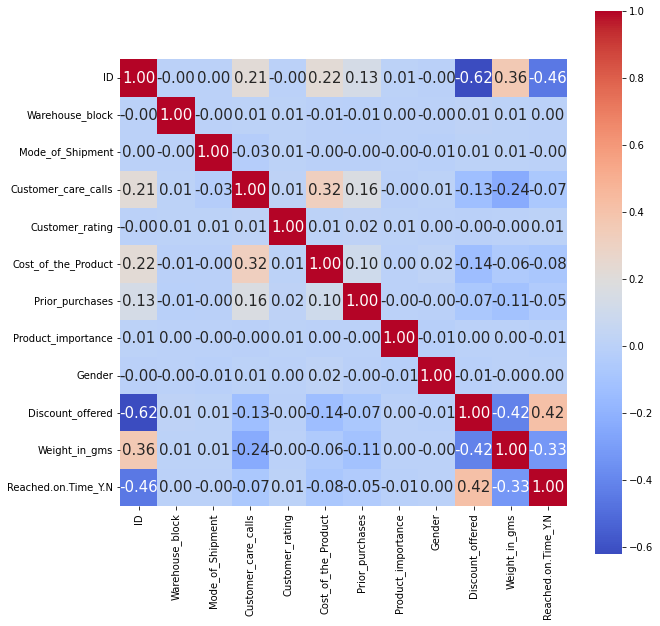

In [55]:
# Mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns
corr = datac.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= datac.columns, 
           yticklabels= datac.columns,
           cmap= 'coolwarm'
           )
plt.show()

###### Variables que tienen correlación <font color='#ECDB44'>0.00</font> con la variable target:<br> *Gender*<br>*Mode_of_Shipment*<br>*Warehouse_block*

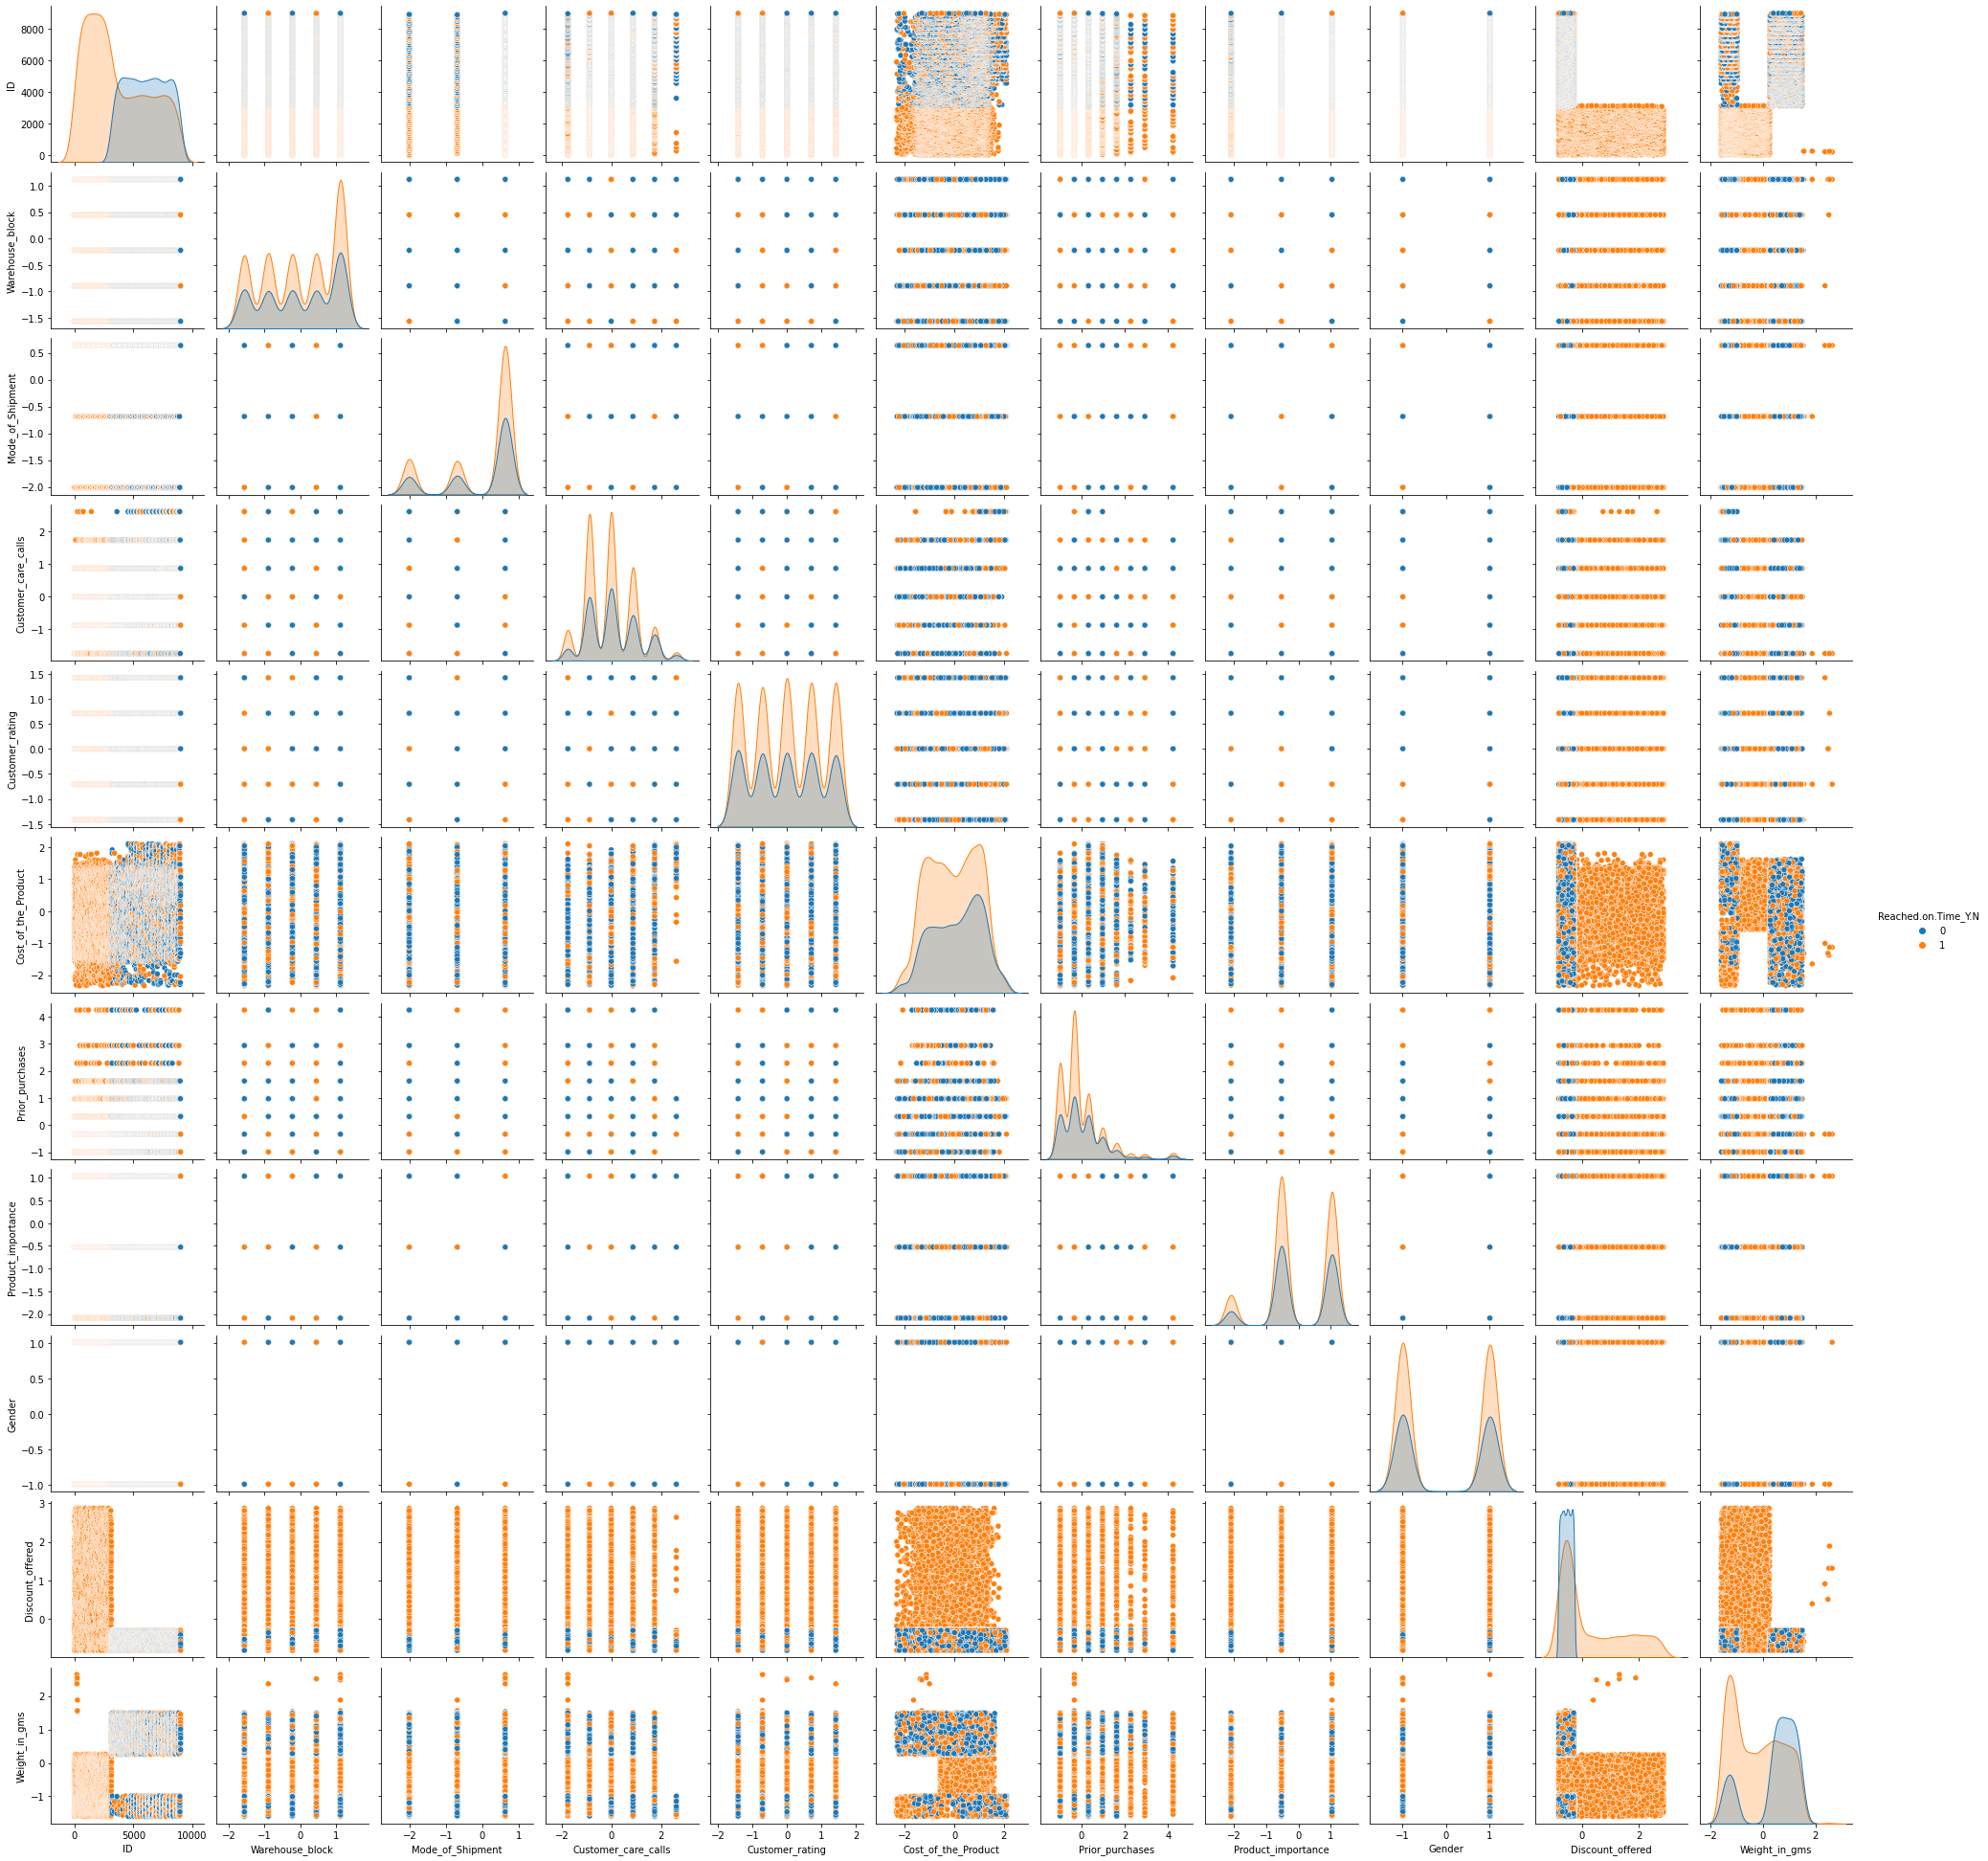

In [56]:
sns.pairplot(datac, hue="Reached.on.Time_Y.N")
plt.show()

In [56]:
datac.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,0.447344,-2.010495,-0.013270,-0.704143,-0.653630,-0.333881,-0.526078,-0.991039,1.661141,-1.456259,1
1,2,1.118174,-2.010495,-0.013270,1.418902,0.154049,-0.986627,-0.526078,1.009042,2.523256,-0.307411,1
2,3,-1.565145,-2.010495,-1.769395,-0.704143,-0.529372,0.318866,-0.526078,1.009042,1.891039,-0.130284,1
3,4,-0.894315,-2.010495,-0.891333,0.003539,-0.674340,0.318866,1.038938,1.009042,-0.292986,-1.490942,1
4,5,-0.223486,-2.010495,-1.769395,-0.704143,-0.508662,-0.333881,1.038938,-0.991039,1.776090,-0.681484,1


In [57]:
#datac.drop(columns=['ID','Gender','Mode_of_Shipment','Warehouse_block'],inplace=True)

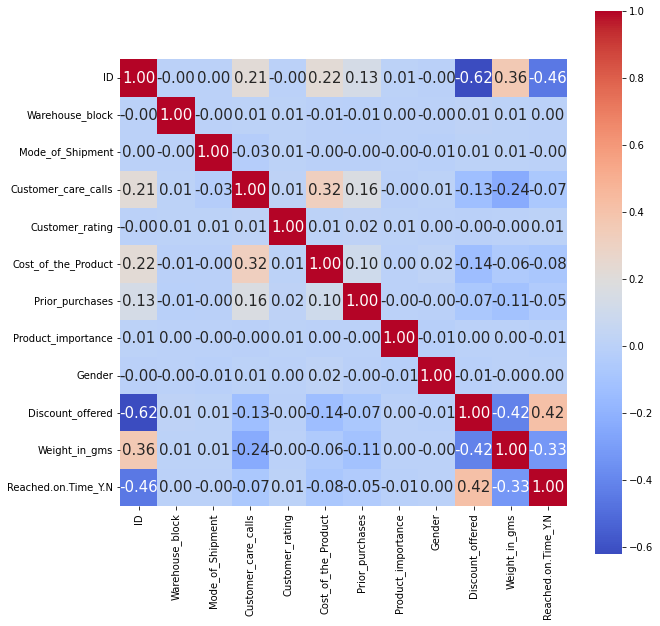

In [57]:
# Mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns
corr = datac.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= datac.columns, 
           yticklabels= datac.columns,
           cmap= 'coolwarm'
           )
plt.show()

In [60]:
sns.pairplot(datac, hue="Reached.on.Time_Y.N")
plt.show()

KeyboardInterrupt: 

###### Las caracteristicas que mejor separan el target son <br> - (Cost_of_the_Product vs Discount_offered),<br> - (Cost_of_the_Product vs Weight_in_gms)<br>- (Discount_offered vs Weight_in_gms)

In [58]:
datac.to_csv("train_preproc.csv",index=False)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


data = pd.read_csv('../Datasets/E-Commerce_test.csv',sep=';',encoding='UTF-8')
print('La cantidad de registros duplicados es:', data.duplicated().sum())

campo = 'Customer_care_calls'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

campo = 'Customer_rating'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

campo = 'Cost_of_the_Product'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

campo = 'Discount_offered'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

campo = 'Weight_in_gms'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

#Variables cualitativas
label_encoder = preprocessing.LabelEncoder()

campo = 'Warehouse_block'
data[campo] = label_encoder.fit_transform(data[campo])

campo = 'Mode_of_Shipment'
data[campo] = label_encoder.fit_transform(data[campo])

campo = 'Product_importance'# Ordinal, label_encoding
data[campo] = label_encoder.fit_transform(data[campo])

campo = 'Gender'# Nominal, label_encoding
data[campo] = label_encoder.fit_transform(data[campo])

campo = 'Warehouse_block'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

campo = 'Mode_of_Shipment'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

campo = 'Product_importance'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])

campo = 'Gender'
scaler = StandardScaler()
scaler.fit(data[[campo]])
data[campo] = scaler.transform(data[[campo]])


#Creando copia del dataframe original
datac = data.copy()

#datac.drop(columns=['ID','Gender','Mode_of_Shipment','Warehouse_block'],inplace=True)

datac.to_csv("test_preproc.csv",index=False)

La cantidad de registros duplicados es: 0
